In [1]:
# load netcdf from OM4 runs

import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm 
import cartopy.crs as ccrs
from matplotlib.colorbar import ColorbarBase

In [18]:
# paths to dataset
BASE = '/scratch/ab10313/OM4_output/'

# load FK data and take mean over last 5 years of JRA cycle
ds_FK = xr.open_dataset(BASE+'CNTRL_ocean_annual_z.2018-2022.agessc.nc')
age_FK = ds_FK.agessc.mean('time')

# load BD data and take mean over last 5 years of JRA cycle
ds_BD = xr.open_dataset(BASE+'MLE22_ocean_annual_z.2018-2022.agessc.nc')
age_BD = ds_BD.agessc.mean('time')

# load static file
ds_stat = xr.open_dataset(BASE+'ocean_annual_z.static.nc')

## plot ideal age difference

Text(0.5, 1.0, 'b) BOD23-BFF11, 1750m')

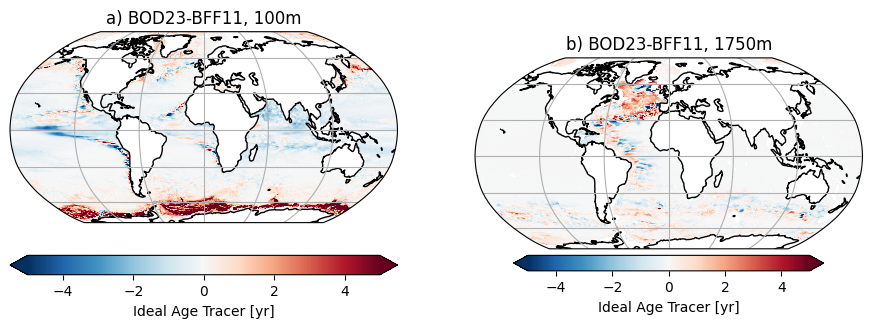

In [23]:
# create a figure
#fig = plt.figure()
fig, ax = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.Robinson(central_longitude=0)},
                        figsize=(11,8.5))

ax=ax.flatten()


# BD minus FK - mixed layer
i_ax = 0

(age_BD.isel(z_l=6) - age_FK.isel(z_l=6) ).rename('Ideal Age Tracer [yr]').plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-5,
    vmax=5,          
    cmap="RdBu_r",  
    cbar_kwargs={'orientation': 'horizontal','pad': 0.05},
)
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('a) BOD23-BFF11, 100m')


# BD minus FK - depth
i_ax = 1
(age_BD.isel(z_l=24) - age_FK.isel(z_l=24) ).rename('Ideal Age Tracer [yr]').plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-5,
    vmax=5,          
    cmap="RdBu_r", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.01, 'shrink':0.8},
)

ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('b) BOD23-BFF11, 1750m')

# 6 panels (old version)

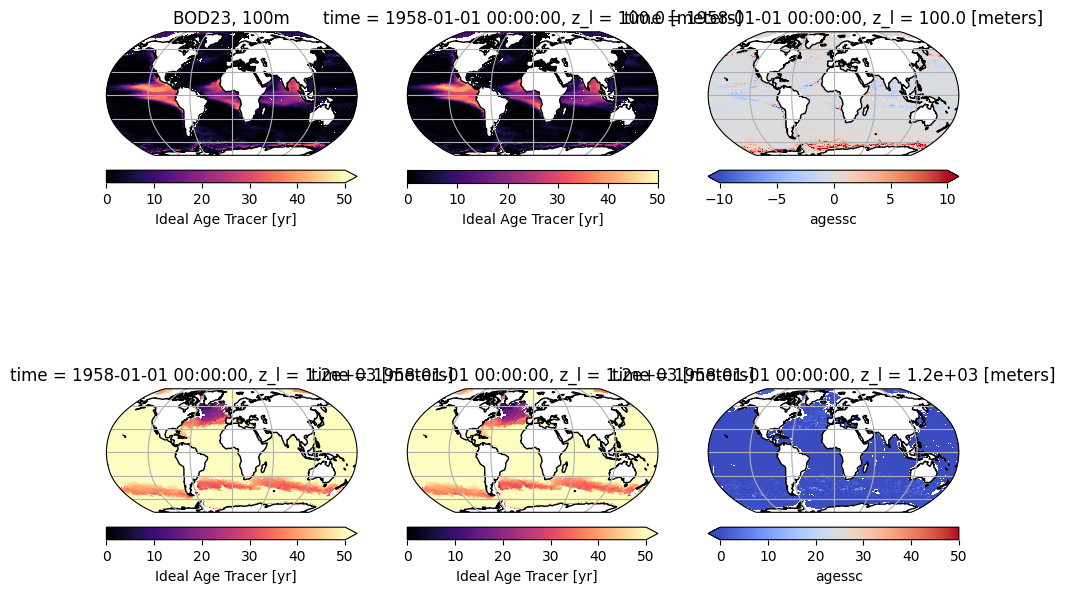

In [51]:
# create a figure
#fig = plt.figure()
fig, ax = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.Robinson(central_longitude=0)},
                        figsize=(11,8.5))

ax=ax.flatten()

# BD - mixed layer
i_ax = 0
age_BD.isel(z_l=6).plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=0,
    vmax=50,
    cmap="magma", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.05},
)
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('BOD23, 100m')



# FK - mixed layer
i_ax = 1
age_FK.isel(z_l=6).plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=0,
    vmax=50,          
    cmap="magma", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.05},
)
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('BFF11, 100m')


# BD minus FK - mixed layer
i_ax = 2
(age_BD.isel(z_l=6) - age_FK.isel(z_l=6) ).plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-10,
    vmax=10,          
    cmap="coolwarm",  
    cbar_kwargs={'orientation': 'horizontal','pad': 0.05},
)
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('BOD23-BFF11, 100m')


# BD - depth
i_ax = 3
age_FK.isel(z_l=20).plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-0,
    vmax=50,          
    cmap="magma", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.05}, 
)
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('BOD23, 1200m')

# FK - depth
i_ax = 4
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('BFF11, 1200m')

age_FK.isel(z_l=20).plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-0,
    vmax=50,          
    cmap="magma", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.05},  
)

# BD minus FK - depth
i_ax = 5
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('BOD23-BFF11, 1200m')

(age_BD.isel(z_l=20) - age_FK.isel(z_l=20) ).plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-0,
    vmax=50,          
    cmap="coolwarm", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.05},
)